In [1]:
# %pylab
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import fftpack
import cv2

# Limpieza de imagenes

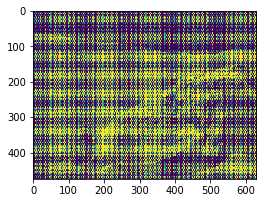

In [2]:
# Cargar un imagen
image = io.imread('images/moonlanding.png')
f, ax = plt.subplots(figsize=(4,4))
ax.imshow(image)

In [5]:
M, N = image.shape
print( (M,N), image.dtype )

((474, 630), dtype('uint8'))


In [7]:
# Tomemos la transformada de Fourier

FFT = fftpack.fftn(image)

# Tomar la norma del coeficiente de Fourier
FFTA = np.abs(FFT)

# Correr las frecuencias bajas al cero
FFTA = fftpack.fftshift(FFTA)

Text(0.5,1,'Spectrum')

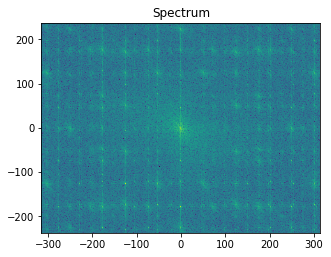

In [12]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.log(1+FFTA), cmap='viridis',
          extent=(-N // 2, N // 2, -M // 2, M //2))


ax.set_title('Spectrum')

In [13]:
# Ajustar el centro del espectro a cero
K = 40
FFTA[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

In [16]:
# Encontrar los picos en el espacio de frecuencias 
picos = FFTA < np.percentile(FFTA, 98)

# Alinear picos con el espectro original

picos = fftpack.ifftshift(picos)

In [17]:
# Vamos a hacer una copia de la transformada de Fourier
FFTCopy = FFT.copy()

# Ajustar picos a cero

FFTCopy = FFTCopy * picos.astype(int)

Text(0.5,1,'Spectrum despues de la supresion')

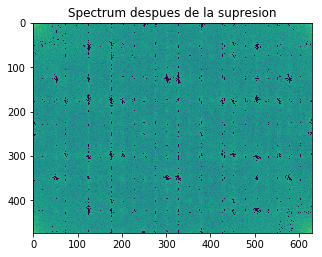

In [20]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.log10(1.+ np.abs(FFTCopy)), cmap='viridis')
ax.set_title('Spectrum despues de la supresion')

In [23]:
# Encontra la nueva imagen filtrada. 
image_filtrada = np.real( fftpack.ifft2(FFTCopy) )

Text(0.5,1,'Imagen_Filtrada')

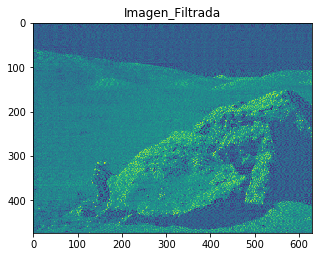

In [24]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image_filtrada)
ax.set_title('Imagen_Filtrada')